In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pancreas_data = {
    "Gu" : 4.5,
    "Gl" : 9,
    "alpha1" : 50.4934,
    "delta1" : 3.98e-4,
    "v" : 3.16e-5,
    "delta2" : 0.3,
    "k" : 0.1,
    "eta" : 4,
    "gammab" : 1e-5,
    "hhat" : 3.93e-3,
    "zeta" : 4,
    "rhob" : 0.02,
    "fb" : 0.05,
    "k1p" : 1.447e-5,
    "CT" : 500,
    "k1m" : 0.10375,
    "krho" : 350,
    "I0" : 1.6,
    "Kf" : 3.43,
    "N" : 2.76e+6 
}

class Pancreas:
    def __init__(self, **kwargs):
        defaults = pancreas_data
        for key, value in defaults.items():
            setattr(self, key, value)
    
    def __str__(self):
        return str(self.__dict__)
    
    def PKPM(self):
        dM = self.alpha1 - self.delta1 * self.M
        dP = self.v * self.M - self.delta2 * self.P - self.k * self.P * self.rho * self.DIR
        dR =  self.k * self.P * self.rho * self.DIR - self.gamma * self.R
        dgamma = self.eta * (-self.gamma + self.gammab + alpha2)
        dD = self.gamma * self.R - self.k1p * (self.CT - self.DIR) * self.D - self.k1m * self.DIR - self.rho * self.DIR
        drho = self.zeta * (self.rho + self.rhob + self.krho * (self.gamma - self.gammab))
        return

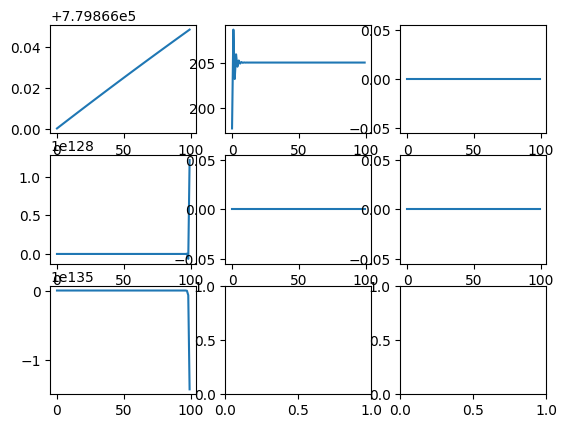

In [38]:
class ODE:
    def __init__(self, data):
        for key, value in data.items():
            setattr(self, key, value)

        if not getattr(self, "state_keys",0):
            self.state_keys = list(data.keys())
        if not getattr(self, "timestep",0):
            self.timestep = 1
        for key in self.state_keys:
            setattr(self, key+"0", data[key])

    def __str__(self):
        return str(self.__dict__)

    def get_state(self):
        """Update state vector to values given by input"""
        x = [getattr(self,key) for key in self.state_keys]
        return x

    def update_state(self, x_new):
        """Update state vector to values given by input"""
        for key, val in zip(self.state_keys, x_new):
            setattr(self, key, val)
        return

    def reset(self):
        """Resets state to x0"""
        x0 = [getattr(self,key+"0") for key in self.state_keys]
        self.update_state(x0)
        return

    def time_arr(self, length):
        return np.arange(0, length*self.timestep, self.timestep)

    def euler_step(self, dx):
        """
        Updates state using state vector derivative and one step of eulers method.
        
        Parameters
        ----------
        dx : numpy array
            Derivative of state vector.
        """
        x_new = self.get_state() + dx * self.timestep
        self.update_state(x_new)
        return

pancreas_data = {
    "state_keys" : ["M", "P", "R", "gamma", "D", "DIR", "rho"],
    "M": 779866,
    "P" : 220,
    "R" : 0,
    "gamma" : 0,
    "D" : 0,
    "DIR" : 0,
    "rho" : 0,

    "Gu" : 4.5,
    "Gl" : 9,
    "alpha1" : 50.4934,
    "delta1" : 3.98e-4,
    "v" : 3.16e-5,
    "delta2" : 0.3,
    "k" : 0.1,
    "eta" : 4,
    "gammab" : 1e-5,
    "hhat" : 1.38-3,
    "zeta" : 4,
    "rhob" : 0.015,
    "fb" : 0.05,
    "k1p" : 5.788e-5,
    "CT" : 300,
    "k1m" : 0.255,
    "krho" : 1050,
    "I0" : 1.6,
    "Kf" : 3.43,
    "N" : 2.76e+6 
}

class Pancreas(ODE):
    def __init__(self, **kwargs):
        defaults = pancreas_data
        self.timestep = 5
        super().__init__(defaults)

    def __str__(self):
        return str(self.__dict__)
    
    def PKPM(self, G):
        if G <= self.Gu:
            alpha1 = self.alpha1
            alpha2 = 0
            delta1 = self.delta1
            f1 = self.fb
            v = self.v
        else:
            alpha1 = 116.98
            delta1 = 1.5e-4
            v = 7.89e-5
            f1 = self.fb + (1 - self.fb) *  (G - self.Gu) / (self.Kf +  G - self.Gu)
            if G <= self.Gl:
                alpha2 = self.hhat * (G - self.Gu)/(G - self.Gu)
            else:
                alpha2 = self.hhat

        dM = alpha1 - delta1 * self.M
        dP = v * self.M - self.delta2 * self.P - self.k * self.P * self.rho * self.DIR
        dR =  self.k * self.P * self.rho * self.DIR - self.gamma * self.R
        dgamma = self.eta * (-self.gamma + self.gammab + alpha2)
        dD = self.gamma * self.R - self.k1p * (self.CT - self.DIR) * self.D - self.k1m * self.DIR - self.rho * self.DIR
        dDIR = self.k1p * (self.CT - self.DIR) * self.D - self.k1m * self.DIR - self.rho * self.DIR
        drho = self.zeta * (self.rho + self.rhob + self.krho * (self.gamma - self.gammab))
        return np.array([dM, dP, dR, dgamma, dD, dDIR, drho])

    def simulate(self,G_list):
        res = []
        for G in G_list:
            dx = self.PKPM(G)
            self.euler_step(dx)
            res.append(self.get_state())
        return np.array(res)

from EHMmodel import *
pan = Pancreas()
Gs = 5.5 * np.ones(100)
y = pan.simulate(Gs)
fig, ax = plt.subplots(3,3)
for i in range(7):
    ax[i//3, i%3].plot(y[:,i])


In [36]:
116.98/1.5e-4

779866.6666666667